In [82]:
import git  #Requires Gitpython installed, to install do "$ pip install Gitpython" in your terminal
import pkg_resources
openfisca_france_location = pkg_resources.get_distribution('openfisca-france').location
repo = git.Repo(openfisca_france_location)
repo.git.status()

sha = repo.head.object.hexsha

print "---This notebook have been runed with--- \n","Openfisca-france :", repo.head.object.hexsha, '\n' 
print "Commit short SHA:", repo.git.rev_parse(sha, short=4)
print "Branch: ", repo.git.rev_parse('--abbrev-ref', "HEAD") #equivalent to: $git rev-parse --abbrev-ref HEAD
print "Date (y/m/d):", repo.git.show("-s", '--format=%ci', 'HEAD^')[:-5],"\n"  # equivalent to: $git show -s --format=%ci HEAD^

print "Openfisca-core :", git.Repo(pkg_resources.get_distribution('openfisca-france').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('openfisca-france').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]


---This notebook have been runed with--- 
Openfisca-france : 7321d6c1a192527105f4fdea7e3ac33a7ecaa70a 

Commit short SHA: 7321d
Branch:  decote2016
Date (y/m/d): 2015-10-03 13:32:16  

Openfisca-core : 7321d6c1a192527105f4fdea7e3ac33a7ecaa70a  Date: 2015-10-03 13:32:16 


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#from openfisca_matplotlib import graphs
import numpy as np
np.set_printoptions(precision = 2, suppress=True, threshold = 5000)

In [83]:
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances
from openfisca_core import periods
import openfisca_france    # module décrivant le système socio-fiscal français
from openfisca_france.tests import base
#from modulation_allocations_familiales.reforms import af_modulation
from openfisca_core import rates
TaxBenefitSystem = openfisca_france.init_country()  # Initialisation de la classe décrivant le système socio-fiscal français
print TaxBenefitSystem
tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français

<class 'openfisca_france.TaxBenefitSystem'>


In [94]:
salaire_de_base_min = 0
salaire_de_base_maximal = 2*10**5
count = (salaire_de_base_maximal/10)+1 #2000 obs
year = 2014
axes_variable = 'salaire_de_base'

In [95]:
def make_couple_avec_enfants_scenario(nombre_enfants = 2, year = 2014, tax_benefit_system = tax_benefit_system ):
    enfant = [dict(
        birth = date(2005, 1, 1),
        )]
    enfants = enfant * nombre_enfants
    scenario = tax_benefit_system.new_scenario().init_single_entity(
        axes = [[
            dict(
                count = count,
                min = 0,
                max = salaire_de_base_maximal,
                name = axes_variable,
                period = year-2,
                ),
            dict(
                count = count,
                min = 0,
                max = salaire_de_base_maximal,
                name = axes_variable,
                period = year-1,
                ),
            dict(
                count = count,
                min = 0,
                max = salaire_de_base_maximal,
                name = axes_variable,
                period = year,
                ),
            ]],
        period = year,
        parent1 = dict(
            birth = date(1980, 1, 1),
            statmarit = 5, #pacsés
            ),
        parent2 = dict(
            birth = date(1980, 1, 1),
            statmarit = 5,
            ),
        )
    return scenario

In [96]:
marginal = rates.marginal_rate(
                   make_couple_avec_enfants_scenario(0).new_simulation().calculate('impo'),
                   make_couple_avec_enfants_scenario(0).new_simulation().calculate_add('salaire_imposable')[::2])


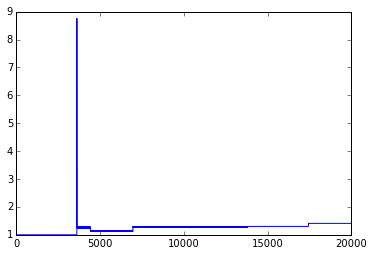

In [97]:
plt.plot(marginal)

Il y a des petits artefacts qui peuvent survenir... On les règles

In [103]:
def smooth_rate(array):
    lol = 0
    for obs in range(0, array.shape[0]): #TODO: find a better way to do range(0, shape)
        if ( array[obs]- array[obs - 1]) > 3:
            array[obs] = 1
    return array

In [104]:
smooth_marginal = marginal
smooth_marginal = smooth_rate(smooth_marginal)

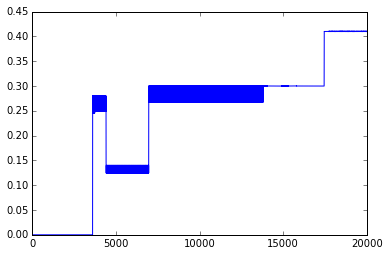

In [105]:
plt.plot(smooth_marginal-1)

On a toujours des artefacts, les taux marginaux ne devraient pas sauter autant... D'autant plus que l'écart de revenu est assez grand (10 euros d'écart...).

In [73]:
(smooth_marginal-1)[::4]

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,

In [ ]:
def find_nearest(array,value):
#    while array[idx] < 1 :
    idx = (np.abs(array-value)).argmin()
    print idx
    print array[idx]
    return salaire_net[idx]/12